# <font color=darkblue>**Universidad Nacional Autónoma de México**
# <font color=darkblue>**Facultad de Ciencias**
# <font color=orange>**Práctica  de Análisis Numérico**
# <font color=orange>**Semestre 2023 - 1**
# Dra. Úrsula Iturrarán Viveros

## Parte computacional
Alumnos:

*   Olvera Trejo Alberto
*   Ramos López Gabriela

In [ ]:
import numpy as np
from sympy import *
import sympy as sym
from IPython.display import display, Latex
import plotly.graph_objects as go
from matplotlib.axis import YAxis
from math import *
import matplotlib.pyplot as plt
import pandas as pd
import plotly.io as pio

# **Ajuste por mínimos cuadrados lineales**

## Ejercicio 1

En la década de 1910, el físico Robert Millikan hizo una serie de mediciones para estudiar el efecto fotoeléctrico el cual consiste en la emisión de electrones por parte de una placa metálica cuando es irradiada con luz de distintas frecuencias; este fenómeno puede describirse por la ecuación
$$
V = \frac{h}{\mathrm{e}}\nu - \frac{\phi}{\mathrm{e}},
$$

donde $h$ es la constante de Planck, $\mathrm{e}$ es la carga eléctrica del electrón, $\nu$ es el valor de la frecuencia de la luz que irradia a una cierta placa metálica, $V$ es el voltaje producido por la emisión de electrones y $\phi$ es un término que representa la cantidad de energía mínima necesaria para que la placa emita un electrón. Nótese que $V$ se puede ver como una función lineal de la forma
$$
V = m\nu + b,
$$

donde $m = \frac{h}{\mathrm{e}}$ y $b = - \frac{\phi}{\mathrm{e}}$. De esta manera, Millikan reportó los siguientes datos

<table>
<tr><th> $\nu$ <th><th> $5.4874\times 10^{14}$ <th><th> $6.931\times 10^{14}$ <th><th> $7.4307\times 10^{14}$ <th><th> $8.2193\times 10^{14}$ <th><th> $9.6074\times 10^{14}$ <th><th> $11.84\times 10^{14}$<tr><tr>
<tr><td> $V$ <td><td> $0.5309$ <td><td> $1.0842$ <td><td> $1.2734$ <td><td> $1.6598$ <td><td> $2.19856$ <td><td> $3.10891$ <td><tr>
<table>
    
Escribe un programa que mediante el método de ecuaciones normales calcule la recta que mejor se ajuste a los datos reportados por Millikan.

In [ ]:
def ec_norm(X, y):
  #Transformamos en arrays
  X = np.array(X)
  y_vec = np.array(y).reshape(len(y), 1)
  n = len(X)
  #Matriz de Vandermonde
  A = np.zeros((n, 2))


  #Llenamos la matriz
  for i in range(n):
    for j in range(2):
      A[i, j] = X[i]**j

  At = np.transpose(A)

  #B = A^t *A, z = A^t*y
  B = np.matmul(At, A)
  z = np.matmul(At, y_vec)

  #Descomponemos A^t*A con Cholesky
  L = np.linalg.cholesky(B)
  
  #Resolvemos L*x_0 = A^t*y
  x_0 = np.linalg.solve(L, z)

  #Ahora resolvemos L^t*a = x_0
  a = np.linalg.solve(np.transpose(L), x_0)

  #Imprimimos el polinomio de segundo grado
  x = sym.Symbol('x')
  
  #Imprimimos el polinomio
  pol = float(a[0]) + float(a[1])*x

  latexpol =f'$P(x) = {latex(pol)}$'
  print("***Polinomio\n")
  display(Latex(latexpol))

  # Graficamos 
  x_graf = np.linspace(min(X)-1, max(X)+1, 100)
  y_graf = [float(pol.subs(x, xi)) for xi in x_graf]

  fig = go.Figure()

  fig.add_trace(
      go.Scatter(x = x_graf, y = y_graf, mode = 'lines',
                 marker=dict(color="LightSeaGreen"), name = 'P(x)')
      )

  fig.add_trace(
      go.Scatter(x = X, y = y, mode = 'markers',
                 marker=dict(size=10, color="MediumPurple"), name = 'Puntos dados')
      )
  fig.update_layout(title_text="Ajuste de minimos cuadrados lineal",
                  title_font_size=30, width=1400, height=700)
  fig.show(renderer = 'svg') 

In [ ]:
X = [5.4874*10**14, 6.931*10**14, 7.4307*10**14,
     8.2193*10**14, 9.6074*10**14, 11.84*10**14]
y = [0.5309, 1.0842, 1.2734, 1.6598, 2.19856, 3.10891]

ec_norm(X, y)

***Polinomio



<IPython.core.display.Latex object>

> - <font color=red> Con los resultados obtenidos de tu programa, ¿cuáles son los valores de $m$ y $b$?</font>

El valor de la pendiente es $m = 4.08822735851751\cdot 10 
^{−15}$ y $b = −1.73123580398135$
> - <font color=red> Algunos años antes de que Millikan hizo estas mediciones ya había encontrado el valor de la carga del electrón; si la carga del electrón es $\mathrm{e}=1.602\times 10^{-19}$; entonces ¿cuál sería el valor de la constante de Planck $h$? .</font>

Sabemos que $m = \dfrac{h}{\mathrm{e}}$, entonces $h = m\mathrm{e}$, por lo que

In [ ]:
print(f'El valor de la constante de Plank es: h = {(4.08822735851751*10**(-15))*(1.602*10**(-19))}')

El valor de la constante de Plank es: h = 6.549340228345051e-34


## Ejercicio 2
Un astrónomo observó el movimiento de un planeta P alrededor de un estrella S y capturó la siguiente información: 

$(-5.5,1.6)$, $(-5.9,1.0)$, $(-6.2,0.3)$, $(-6.3,-1.0)$, $(-5.7,-2.1)$, $(-2.8,-3.0)$, $(0.5,-1.7)$, $(2.3,0.8)$, $(0.4,3.9)$, $(-5.6,1.6)$, $(-4.0,3.0)$



Donde cada punto $(x_i,y_i)$, $i=1,2,...,11$, es la posición del planeta P en un plano $XY$.

Tomando en cuenta que la ecuación de la elipse está dada por:

$$Ay^2 + Bxy + Cx + Dy + E = x^2$$

Escribe un programa que, mediante el método de ecuaciones normales, encuentre la elipse que mejor se ajuste a los datos capturados y que grafique dicha elipse junto con los puntos $(x_i,y_i)$.

In [ ]:
#Para poder evaluar la elipse en funcion de x, creamos dos funciones
def elipse_pos(A, B, C, D, E, x):
  a = A
  b = B*x + D
  c = C*x + E - x**2

  num = -b + np.sqrt(b**2 - 4*a*c)
  den = 2*a
 
  return num/den

def elipse_neg(A, B, C, D, E, x):
  a = A
  b = B*x + D
  c = C*x + E - x**2

  num = -b - np.sqrt(b**2 - 4*a*c)
  den = 2*a
 
  return num/den

In [ ]:
def elipse(X, y):
  #Transformamos en arrays
  X = np.array(X)
  y_vec = np.array(y).reshape(len(y), 1)
  n = len(X)
  #Matriz de Vandermonde
  A = np.zeros((n, 5))


  #Llenamos la matriz
  for i in range(n):
    for j in range(5):
      if j == 0:
        A[i, j] = y[i]**2
      elif j == 1:
        A[i, j] = X[i]*y[i]
      elif j == 2:
        A[i, j] = X[i]
      elif j == 3:
        A[i, j] = y[i]
      elif j == 4:
        A[i, j] = 1
        

  At = np.transpose(A)

  #B = A^t *A, z = A^t*y
  B = np.matmul(At, A)
  z = np.matmul(At, np.array(X).reshape(len(X), 1)**2)

  #Descomponemos A^t*A con Cholesky
  L = np.linalg.cholesky(B)

  #Resolvemos L*x_0 = A^t*y
  x_0 = np.linalg.solve(L, z)

  #Ahora resolvemos L^t*a = x_0
  a = np.linalg.solve(np.transpose(L), x_0)

  #Imprimimos el polinomio de segundo grado redondeando a 3 decimales
  x_sym = sym.Symbol('x')
  y_sym = sym.Symbol('y')
  
  #Imprimimos el polinomio
  pol = float(a[0])*y_sym**2  + float(a[1])*x_sym*y_sym + float(a[2])*x_sym + float(a[3])*y_sym + float(a[4])

  A, B, C, D, E = a[0][0], a[1][0], a[2][0], a[3][0], a[4][0]
 
  latexpol =f'${latex(pol)} = x^{2}$'
  print("***Elipse\n")
  display(Latex(latexpol))

  # Graficamos 
  linspace = np.linspace(min(X)-0.3, max(X) + 0.3, 100)
  x_graf = []
  y_graf = []
  for i in linspace:
    x_graf.append(i)
    x_graf.append(i)
    y_graf.append(elipse_pos(A, B, C, D, E, i))
    y_graf.append(elipse_neg(A, B, C, D, E, i))

  fig = go.Figure()

  fig.add_trace(
      go.Scatter(x = x_graf, y = y_graf, mode = 'markers',
                 marker=dict(color="LightSeaGreen"), name = 'P(x)')
      )

  fig.add_trace(
      go.Scatter(x = X, y = y, mode = 'markers',
                 marker=dict(size=10, color="MediumPurple"), name = 'Puntos dados')
      )
  fig.update_layout(title_text="Ajuste de minimos cuadrados para una elipse",
                   title_font_size=30, width=1400, height=700)
  fig.show(renderer = 'svg') 


In [ ]:
X = [-5.5, -5.9, -6.2, -6.3, -5.7, -2.8, 0.5, 2.3, 0.4, -5.6, -4]
y = [1.6, 1, 0.3, -1, -2.1, -3, -1.7, 0.8, 3.9, 1.6, 3]

elipse(X, y)

***Elipse



<IPython.core.display.Latex object>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning:

invalid value encountered in sqrt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning:

invalid value encountered in sqrt



## Ejercicio 3
Escribe una rutina que, para $n = 0,1,2,3,4,5$, usando el método de ecuaciones normales encuentre un polinomio de grado $n$ que ajuste los datos mostrados en la siguiente tabla:

$$t = 0.0 \quad 1.0 \quad 2.0 \quad 3.0 \quad 4.0 \quad 5.0 $$
$$y = 1.0 \quad 2.7 \quad 5.8 \quad 6.6 \quad 7.5 \quad 9.9 $$

Para cada polinomio el programa debe mostrar la gráfica de dicho polinomio junto con los puntos mostrados en la tabla anterior.


In [ ]:
def ec_norma_grad(X, y, grad):
  #Transformamos en arrays
  X = np.array(X)
  y_vec = np.array(y).reshape(len(y), 1)
  n = len(X)
  #Matriz de Vandermonde
  A = np.zeros((n, grad + 1))

  #Llenamos la matriz
  for i in range(n):
    for j in range(grad + 1):
      A[i, j] = X[i]**j

  At = np.transpose(A)

  #B = A^t *A, z = A^t*y
  B = np.matmul(At, A)
  z = np.matmul(At, y_vec)

  #Descomponemos A^t*A con Cholesky
  L = np.linalg.cholesky(B)
  
  #Resolvemos L*x_0 = A^t*y
  x_0 = np.linalg.solve(L, z)

  #Ahora resolvemos L^t*a = x_0
  a = np.linalg.solve(np.transpose(L), x_0)
  
  #Imprimimos el polinomio y creamos los arreglos para graficar
  x = sym.Symbol('x')
  x_graf = np.linspace(min(X)-1, max(X)+1, 100)
  pol = 0
  
  #Diferenciamos el caso cuando el grado es cero y cuando no lo es
  if grad == 0:
    pol = a[0]
    y_graf = [float(a[0]) for xi in x_graf]

  else:
    for i in range(grad + 1):
      pol += float(a[i])*x**i
    y_graf = [float(pol.subs(x, xi)) for xi in x_graf]

  latexpol =f'$P(x) = {latex(pol)}$'
  print("***Polinomio\n")
  display(Latex(latexpol))

  # Graficamos 
  fig = go.Figure()

  fig.add_trace(
      go.Scatter(x = x_graf, y = y_graf, mode = 'lines',
                 marker=dict(color="LightSeaGreen"), name = 'P(x)')
      )

  fig.add_trace(
      go.Scatter(x = X, y = y, mode = 'markers',
                 marker=dict(size=10, color="MediumPurple"), name = 'Puntos dados')
      )
  fig.update_layout(title_text="Ajuste de minimos cuadrados",
                  title_font_size=30, width=1400, height=700)
  fig.show(renderer = 'svg') 

In [ ]:
X = [0, 1, 2, 3, 4, 5]
y = [1, 2.7, 5.8, 6.6, 7.5, 9.9]

for i in range(6):
  ec_norma_grad(X, y, i)


***Polinomio



<IPython.core.display.Latex object>

***Polinomio



<IPython.core.display.Latex object>

***Polinomio



<IPython.core.display.Latex object>

***Polinomio



<IPython.core.display.Latex object>

***Polinomio



<IPython.core.display.Latex object>

***Polinomio



<IPython.core.display.Latex object>

> - <font color=red> ¿Qué polinomio ajusta mejor el comportamiento de los datos?</font>

El polinomio de grado 5 es el que ajusta mejor

> - <font color=red> Explica tu respuesta anterior.</font>

Lo anterior se debe a que estamos sobre ajustando el modelo a nuestros datos, pues entre mayor sea el grado del polinomio entonces el ajuste será mejor.

## Ejercicio 4
Escribe un programa que calcule la factorización QR mediante las reflexiones de Householder de la siguiente matriz: 

$$A = \left(\begin{array}{cc} 1.0 & 1.0 & 1.5\\ 1.5 & 1.0 & 1.0  \\ 1.0 & 1.5 & 1.0 \\ 0.0 & 0.5 & -0.5 \\ -0.5 & 0.5 & 0.0\end{array}\right)$$

In [ ]:
def columnas(x):
    """
    Convierte 1d arrays a vectores columna
    """
    x.shape = (1, x.shape[0])
    return x

def norma(x):
    """
    Calcula la norma del vector
    """
    return np.sqrt(np.sum(np.square(x)))

def householder(v):
    """
    Nos devuelve la matriz de Householder
    """
    tamaño_v = v.shape[1]
    e1 = np.zeros_like(v)
    e1[0, 0] = 1
    vector = norma(v) * e1
    if v[0, 0] < 0:
        vector = - vector
    u = (v + vector).astype(np.float32)
    H = np.identity(tamaño_v) - ((2 * np.matmul(np.transpose(u), u)) / np.matmul(u, np.transpose(u)))
    return H

def fact_qr(q, r, iter, n):
    """
    Devuelve la factorización Q R de una matriz
    """
    v = columnas(r[iter:, iter])
    Hbar = householder(v)
    H = np.identity(n)
    H[iter:, iter:] = Hbar
    r = np.matmul(H, r)
    q = np.matmul(q, H)
    return q, r

def main():
    A = np.array([[1.0, 1.0, 1.5], 
         [1.5, 1.0, 1.0],
         [1.0, 1.5, 1.0],
         [0.0, 0.5, -0.5],
         [-0.5, 0.5, 0.0]])
    n = 5
    m = 3
    print('La matriz es \n', A, '\n')
    Q = np.identity(n)
    R = A.astype(np.float32)
    for i in range(min(n, m)):
        Q, R = fact_qr(Q, R, i, n)
    min_dim = min(m, n)
    R = np.around(R, decimals=6)
    R = R[:min_dim, :min_dim]
    Q = np.around(Q, decimals=6)
    print('La factorización QR de A es: \n')
    print('Matriz R:')
    print(R, '\n')
    print('Matriz Q:')
    print(Q, '\n')
if __name__ == "__main__":
    main()

La matriz es 
 [[ 1.   1.   1.5]
 [ 1.5  1.   1. ]
 [ 1.   1.5  1. ]
 [ 0.   0.5 -0.5]
 [-0.5  0.5  0. ]] 

La factorización QR de A es: 

Matriz R:
[[-2.12132  -1.767767 -1.885618]
 [-0.        1.274755  0.32686 ]
 [-0.       -0.        0.915209]] 

Matriz Q:
[[-0.471405  0.130744  0.621034  0.564321 -0.237786]
 [-0.707107 -0.196116 -0.294174  0.03608   0.611309]
 [-0.471405  0.522976 -0.065372 -0.600401 -0.373523]
 [ 0.        0.392232 -0.686406  0.564321 -0.237786]
 [ 0.235702  0.719092  0.228802  0.03608   0.611309]] 



## Ejercicio 5
Escribe un programa que, utilizando el método de descomposición QR, encuentre el polinomio de grado 2 que mejor se ajuste a los datos de la tabla:


$$t =\: 0.0 \quad\: 1.0 \quad\:\: 2.0 \quad\:\: 3.0  $$
$$y = 7.0 \quad 11.0 \quad 17.0 \quad 25.0 $$

Tenemos el siguiente conjunto de puntos
Nuestros valores de las abcisas son 
 [[0.]
 [1.]
 [2.]
 [3.]]
Nuestros valores de las ordenada son 
 [[ 7.]
 [11.]
 [17.]
 [25.]]
La matriz V será 
 [[1. 0. 0.]
 [1. 1. 1.]
 [1. 2. 4.]
 [1. 3. 9.]]
La factorización QR de V es:
Matriz R:
[[-2.       -3.       -7.      ]
 [-0.        2.236068  6.708204]
 [ 0.        0.        2.      ]] 

Matriz Q:
[[-0.5      -0.67082   0.5      -0.223607]
 [-0.5      -0.223607 -0.5       0.67082 ]
 [-0.5       0.223607 -0.5      -0.67082 ]
 [-0.5       0.67082   0.5       0.223607]] 

Matriz transpuesta de Q:
[[-0.5      -0.5      -0.5      -0.5     ]
 [-0.67082  -0.223607  0.223607  0.67082 ]
 [ 0.5      -0.5      -0.5       0.5     ]
 [-0.223607  0.67082  -0.67082   0.223607]] 

Nuestro vector solución será:
[7.00000402 2.99999732 1.        ] 

Nuestro polinomio será: 7.000004024922319 + 2.9999973167184537 x + 1.0 x**2


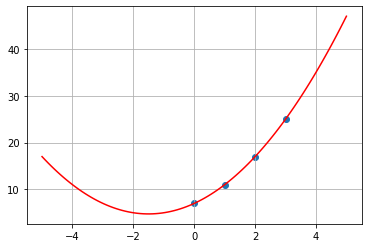

In [ ]:
print("Tenemos el siguiente conjunto de puntos")
t = np.array([[0], [1.0], [2.0] ,[3.0]])
y = np.array([[7.0] , [11.0] , [17.0], [25.0]])
print("Nuestros valores de las abcisas son \n", t)
print("Nuestros valores de las ordenada son \n", y)


# Como queremos un polinomio de grado 2 debemos construir nuestra matriz V
# V = np.vander(t, N = 3) 
V = np.array([[1.0, 0.0, 0.0],
             [1.0, 1.0, 1.0],
              [1.0, 2.0, 4.0],
              [1.0, 3.0, 9.0]])

# Ahora encontremos la factorización QR de V
def main():
    A = V
    n = 4  
    m = 3
    print('La matriz V será \n', A)
    Q = np.identity(n)
    R = A.astype(np.float32)
    for i in range(min(n, m)):
        Q, R = fact_qr(Q, R, i, n)
    min_dim = min(m, n)
    R = np.around(R, decimals=6)
    R = R[:min_dim, :min_dim]
    Q = np.around(Q, decimals=6)
    print('La factorización QR de V es:')
    print('Matriz R:')
    print(R, '\n')
    print('Matriz Q:')
    print(Q, '\n')

    # Ya que tenemos la factorización QR debemos resolver Ra = Q^T y
    QT = np.transpose(Q)
    print('Matriz transpuesta de Q:')
    print(QT, '\n')
    QTy = np.dot(QT, y)
    b = np.array([QTy[i,0] for i in range(3)])
    a = np.linalg.solve(R,b)
    print("Nuestro vector solución será:")
    print(a, '\n')
    print("Nuestro polinomio será:", a[0],"+",a[1],"x +",a[2],"x**2")

    # Grafiquemos
    ts = [0, 1.0, 2.0 ,3.0]
    ys = [7.0 ,11.0 ,17.0, 25.0]
    xis = np.linspace(-5, 5 ,100)
    yis = a[0] + a[1]*xis + a[2]*xis**2
    plt.plot(xis, yis, 'r')
    plt.grid()
    plt.scatter(ts, ys)
    plt.show()


if __name__ == "__main__":
    main()




# Resolución de ecuaciones no lineales

## Ejercicio 6
El número áureo está dado por

$$\phi = \frac{1+\sqrt{5}}{2},$$

y es solución de la ecuación

$$ x ^2 - x - 1 = 0.$$

Escribe un programa que mediante el método de bisección calcule aproximaciones $x_k$ de la raíz positiva de la ecuación cuadrática anterior con una tolerancia de error de $\vert x_k - \phi \vert \leq 10^{-10}$, donde el valor de $\phi$ es calculado por la máquina. Para cada iteración imprime $k$, el valor $x_k$ y el error.

In [ ]:
#Tomemos el intervalo [1, 2] para poder usar el metodo de biseccion

def aureo(x):
  return x**2 - x -1

a = 1
b = 2
k = 0

bandera = True

while bandera:
  k += 1
  c = a + (b-a)/2

  if aureo(a)*aureo(c) < 0:
    b = c
  elif aureo(c)*aureo(b):
    a = c

  #El error lo obtenemos directamente al evaluar la funcion aurea en c
  error = aureo(c)
  print('***')
  print(f'Itenarion {k}')
  print(f'x_k = {c}')
  print(f'error = {abs(error)}')


  #Usamos la cota del error dada por el teorema de la biseccion para detener el ciclo
  if 2**(-k-1) < 10**(-10):
    bandera = False
    print(f'\n ******El número aureo es aproximadamente {c}')
  

***
Itenarion 1
x_k = 1.5
error = 0.25
***
Itenarion 2
x_k = 1.75
error = 0.3125
***
Itenarion 3
x_k = 1.625
error = 0.015625
***
Itenarion 4
x_k = 1.5625
error = 0.12109375
***
Itenarion 5
x_k = 1.59375
error = 0.0537109375
***
Itenarion 6
x_k = 1.609375
error = 0.019287109375
***
Itenarion 7
x_k = 1.6171875
error = 0.00189208984375
***
Itenarion 8
x_k = 1.62109375
error = 0.0068511962890625
***
Itenarion 9
x_k = 1.619140625
error = 0.002475738525390625
***
Itenarion 10
x_k = 1.6181640625
error = 0.00029087066650390625
***
Itenarion 11
x_k = 1.61767578125
error = 0.0008008480072021484
***
Itenarion 12
x_k = 1.617919921875
error = 0.0002550482749938965
***
Itenarion 13
x_k = 1.6180419921875
error = 1.7896294593811035e-05
***
Itenarion 14
x_k = 1.61798095703125
error = 0.00011857971549034119
***
Itenarion 15
x_k = 1.618011474609375
error = 5.034264177083969e-05
***
Itenarion 16
x_k = 1.6180267333984375
error = 1.6223406419157982e-05
***
Itenarion 17
x_k = 1.6180343627929688
error = 8.36

Escribe otro programa que mediante el método de la secante calcule una aproximación $x_k$ de la raíz positiva de la ecuación cuadrática arriba mencionada; utiliza la misma tolerancia de error $\vert x_k - \phi \vert \leq 10^{-10}$.  Para cada iteración imprime $k$, el valor $x_k$ y el error.

In [ ]:
#Tomamos las aproximaciones iniciales
xn = 1
xn_1 = 2
k = 0

bandera = True

while bandera:
  #Contador de las iteraciones
  k += 1
  a = xn - xn_1
  b = aureo(xn) - aureo(xn_1)

  #Formula del metodo de la secante
  secante = xn - (a/b)*aureo(xn)
  #Actualizamos los terminos n y el n-1
  xn, xn_1 = secante, xn
  error = aureo(xn)

  #Imrpimimos la iteracion, el valor de x_k y el error
  print(f'Iteración {k}')
  print(f'x_k = {xn}')
  print(f'error = {error}')

  #Si el error es menor que la cota dada, terminamos el bucle
  if abs(error) < 10**(-10):
    bandera = False
    print(f'\n ******El número aureo es aproximadamente {c}')

Iteración 1
x_k = 1.5
error = -0.25
Iteración 2
x_k = 1.6666666666666667
error = 0.11111111111111138
Iteración 3
x_k = 1.6153846153846154
error = -0.005917159763313418
Iteración 4
x_k = 1.6179775280898876
error = -0.00012624668602478906
Iteración 5
x_k = 1.6180340557275543
error = 1.4976660400733977e-07
Iteración 6
x_k = 1.6180339887482036
error = -3.781641666478208e-12

 ******El número aureo es aproximadamente 1.6180339887505397


> - <font color=red> ¿Qué método converge en menos iteraciones?</font>

En este caso el método que converge más rápido es el método de la secante
> - <font color=red> Explica tu respuesta.

El número de iteraciones que se hacen usando el método de la secante son 6, mientras que el método de la bisección usó 33 iteraciones.

Por lo visto en clase, el método de la bisección tiene una convergencia muy lenta, es más rápido usar Newton-Rhapson, y como el método de la secante es una variación del de Newton, entonces eso explica su rápida convergencia

## Ejercicio 7
La siguiente ecuación

$$ \left( p+ \frac{n^2a}{V^2} \right)\left( V-nb \right) = nRT$$

se conoce como ecuación de Van der Waals y describe el comportamiento de un gas de manera más realista que la ecuación de gas ideal. En dicha ecuación: $p$ es la presión, $V$ es el volumen, $n$ es el número de moles del gas, $a$ y $b$ son constantes que dependen del gas en cuestión, $R = 8.3145 \frac{J}{mol\cdot K}$ es la constante universal de los gases y $T$ es la temperatura.

Un gas tiene los siguientes parámetros: $a = 0.547 \,Pa\cdot m^3$, $b = 3.052\times 10^{-5} \frac{m^3}{mol}$, $p = 101325 \,Pa$, $n = 70 \,mol$ y $T = 400\,K$. Encuentra el volumen $V$ de dicho gas por medio de un programa que utilice el método de Newton-Raphson con iteraciones $k = 1,2,...,15$. En cada iteración imprime el valor de $V_k$ y la tolerancia de error.
*Sugerencia*: multiplica por $V^2$ ambos miembros de la ecuación y encuentra la raíz positiva de la ecuación cúbica resultante.

In [ ]:
a = 0.547
b = 3.052
p = 101325
n = 70
T = 400
R = 8.3145

def h(V):
  return p*V**3 - (p*n*b + n*R*T)*V**2 + (n**2)*a*V - a*b*n**3

def h_derivada(V):
  return 3*p*V**2 - 2*(p*n*b + n*R*T)*V + (n**2)*a 

x0 = 0

for _ in range(15):
  x0 = x0 - h(x0)/h_derivada(x0)

print(f'El volumen aproximado es: {x0} metros cúbicos')

El volumen aproximado es: 215.9376152768815 metros cúbicos


## Ejercicio 8

Escribe una rutina que mediante el método de punto fíjo calcule la raíz de la ecuación:

$$ x^2 + 3x -4 = 0, $$

considera $g(x) = \frac{4}{x + 3}$. En cada iteración imprime el número de pasos y utiliza una tolerancia de error de $10^{-8}$.

In [ ]:
def f(x):
  y = x**2 + 3*x - 4
  return y

def g(x):
  y = 4/(x+3)
  return y

x0 = float(3.0)
j = int(0)

iteraciones = []
aprox_raiz = []
fx = []

while abs(g(x0)-x0) >= 1e-8:
  j = j+1
  x = g(x0)
  x0 = x
  iteraciones.append(j)
  aprox_raiz.append(x0)
  fx.append(f(x0))

print('El valor de la raiz de la ecuación es x=', x0)     

tabla = pd.DataFrame({'Iteraciones' : iteraciones, 'Aprox. de la raiz': aprox_raiz, 'f(x)' : fx})
tabla

El valor de la raiz de la ecuación es x= 1.0000000053218434


,Iteraciones,Aprox. de la raiz,f(x)
0,1,0.666667,-1.555556e+00
1,2,1.090909,4.628099e-01
2,3,0.977778,-1.106173e-01
3,4,1.005587,2.796417e-02
4,5,0.998605,-6.971556e-03
5,6,1.000349,1.744105e-03
6,7,0.999913,-4.359502e-04
7,8,1.000022,1.089923e-04
8,9,0.999995,-2.724778e-05
9,10,1.000001,6.811963e-06
